# Predicting student performance in secondary education (high school). 

Project Details:

Project Name: Students Performance

Project Description: This project aims to predict the performance of students based on their academic and non-academic attributes. The project will use a machine learning algorithm to train a model that can predict the performance of students based on their attributes.

The data source for this project is a dataset of student performance data. The dataset contains information about the students' academic and non-academic attributes, as well as their performance in various subjects. _Link:_ https://archive.ics.uci.edu/dataset/320/student+performance





#### Import Libraries

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


%matplotlib inline

### Data Preparation

In [340]:
df = pd.read_csv('data/student-mat.csv', sep=',', header=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [341]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')


In [342]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings


['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [343]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [344]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
dtype: object

## Exploratory Data Analysis

In [345]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

school
['gp' 'ms']
2

sex
['f' 'm']
2

age
[18 17 15 16 19]
8

address
['u' 'r']
2

famsize
['gt3' 'le3']
2

pstatus
['a' 't']
2

medu
[4 1 3 2 0]
5

fedu
[4 1 2 3 0]
5

mjob
['at_home' 'health' 'other' 'services' 'teacher']
5

fjob
['teacher' 'other' 'services' 'health' 'at_home']
5

reason
['course' 'other' 'home' 'reputation']
4

guardian
['mother' 'father' 'other']
3

traveltime
[2 1 3 4]
4

studytime
[2 3 1 4]
4

failures
[0 3 2 1]
4

schoolsup
['yes' 'no']
2

famsup
['no' 'yes']
2

paid
['no' 'yes']
2

activities
['no' 'yes']
2

nursery
['yes' 'no']
2

higher
['yes' 'no']
2

internet
['no' 'yes']
2

romantic
['no' 'yes']
2

famrel
[4 5 3 1 2]
5

freetime
[3 2 4 1 5]
5

goout
[4 3 2 1 5]
5

dalc
[1 2 5 3 4]
5

walc
[1 3 2 4 5]
5

health
[3 5 1 2 4]
5

absences
[ 6  4 10  2  0]
34

g1
[ 5  7 15  6 12]
17

g2
[ 6  5  8 14 10]
17

g3
[ 6 10 15 11 19]
18



In [346]:
df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,gp,f,17,u,gt3,t,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,gp,f,15,u,le3,t,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,gp,f,15,u,gt3,t,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,gp,f,16,u,gt3,t,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,ms,m,20,u,le3,a,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,ms,m,17,u,le3,t,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,ms,m,21,r,gt3,t,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,ms,m,18,r,le3,t,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Distribution of age

<Axes: xlabel='age', ylabel='Count'>

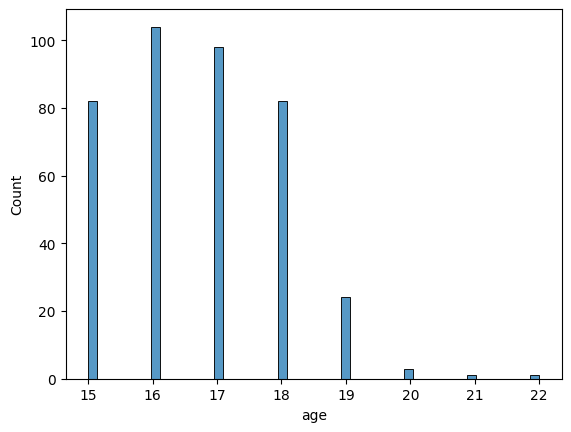

In [347]:
sns.histplot(df.age, bins=50)

Distribution of studytime

<Axes: xlabel='studytime', ylabel='Count'>

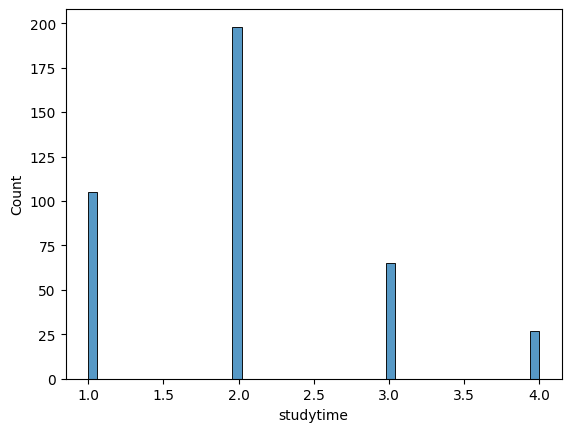

In [348]:
sns.histplot(df.studytime, bins=50)

Distribution of performances

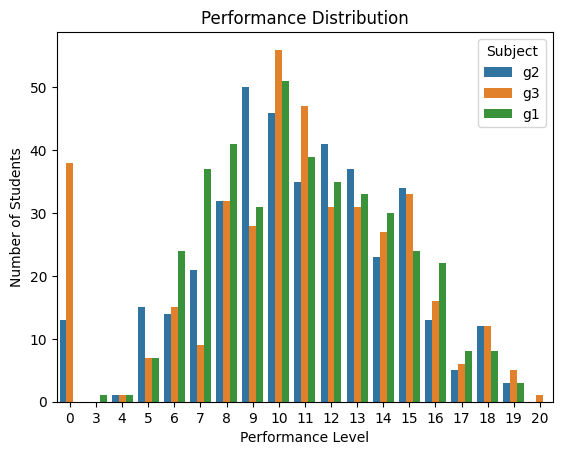

In [349]:
# Reshape data for easier plotting
df_melted = df.melt(value_vars=['g1', 'g2', 'g3'], var_name='Subject', value_name='Performance')
sns.countplot(x='Performance', hue='Subject', data=df_melted)
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.title("Performance Distribution")
plt.legend(title="Subject")
plt.show()


Missing values

In [350]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

## Validation Metrics

In [351]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [352]:
n

395

In [353]:
n_val, n_test, n_train

(79, 79, 237)

In [354]:
df.iloc[[20, 3, 2, 6]]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
20,gp,m,15,u,gt3,t,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15
3,gp,f,15,u,gt3,t,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
2,gp,f,15,u,le3,t,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
6,gp,m,16,u,le3,t,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


In [355]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [356]:
idx = np.arange(n)

In [357]:
np.random.seed(2)
np.random.shuffle(idx)


In [358]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [359]:
df_train.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
94,gp,m,15,u,le3,t,2,2,services,health,...,4,3,4,1,1,4,6,11,13,14
32,gp,m,15,r,gt3,t,4,3,teacher,at_home,...,4,5,2,1,1,5,0,17,16,16
222,gp,f,16,u,gt3,t,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
329,gp,f,17,u,gt3,t,4,4,teacher,teacher,...,4,3,3,1,2,4,4,14,14,14
369,ms,f,18,r,gt3,t,4,4,other,teacher,...,3,2,2,4,2,5,10,14,12,11


In [360]:
len(df_train), len(df_val), len(df_test)

(237, 79, 79)

In [361]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [362]:
y_train = np.log1p(df_train.g1.values)
y_val = np.log1p(df_val.g1.values)
y_test = np.log1p(df_test.g1.values)

In [363]:
len(y_train)

237

## Training Linear Regression Model

In [364]:
df_train.iloc[10]

school                gp
sex                    f
age                   16
address                u
famsize              gt3
pstatus                t
medu                   2
fedu                   2
mjob            services
fjob               other
reason        reputation
guardian          mother
traveltime             2
studytime              2
failures               0
schoolsup             no
famsup                no
paid                 yes
activities           yes
nursery               no
higher               yes
internet             yes
romantic              no
famrel                 3
freetime               4
goout                  4
dalc                   1
walc                   4
health                 5
absences               2
g1                    13
g2                    13
g3                    11
Name: 10, dtype: object

In [365]:
xi = [368, 22, 55]
q0 = 8.12
w = [0.01, 0.04, 0.002]

In [366]:
def linear_regression(xi):
    n = len(xi)

    pred = q0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [367]:
xi = [368, 22, 55]
q0 = 8.12
w = [0.01, 0.04, 0.002]

In [368]:
linear_regression(xi)

12.79

In [369]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Students Baseline Model

In [370]:
df_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [371]:
base = [ 'age', 'studytime','failures', 'freetime', 'health', 'absences', 'g1', 'g2', 'g3']

X_train = df_train[base].fillna(0).values

q0, q = train_linear_regression(X_train, y_train)

y_pred = q0 + X_train.dot(q)

In [372]:
q0

np.float64(1.4882210329123216)

In [373]:
q

array([ 0.00054482,  0.00287967, -0.01603405, -0.00382416,  0.00288887,
        0.00038144,  0.08610665,  0.00086874, -0.00072037])

<Axes: ylabel='Count'>

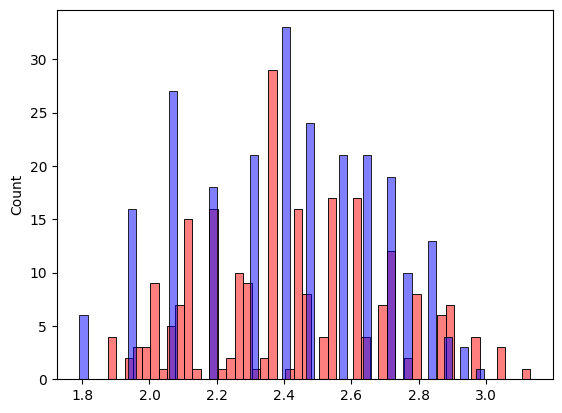

In [374]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## RMSE

In [375]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [376]:
rmse(y_train, y_pred)

np.float64(0.040596518233238434)

## Validating the model

In [377]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [378]:
X_train = prepare_X(df_train)
q0, q = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = q0 + X_val.dot(q)
rmse(y_val, y_pred)

np.float64(0.045015373625840786)

## Feature Engineering

In [379]:
def prepare_X(df):
    df = df.copy()
    
    # Base features (include any existing columns you want to retain)
    base = ['g1', 'g2', 'g3']  # Example for grades columns

    # Feature engineering
    df['average_grade'] = df[['g1', 'g2', 'g3']].mean(axis=1)  # Average of g1, g2, g3
    df['total_grade'] = df[['g1', 'g2', 'g3']].sum(axis=1)  # Total of g1, g2, g3

    # Adding categorical features with one-hot encoding
    if 'study_time' in df.columns:
        df = pd.get_dummies(df, columns=['study_time'], prefix='study', drop_first=True)

    if 'absences' in df.columns:
        df['high_absence'] = (df['absences'] > df['absences'].median()).astype(int)  # High absence flag

    # Select features
    features = base + ['age', 'average_grade', 'total_grade'] + \
               [col for col in df.columns if col.startswith('study')] + ['high_absence']
    
    # Prepare final data
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X


In [380]:
X_train = prepare_X(df_train)
q0, q = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = q0 + X_val.dot(q)
rmse(y_val, y_pred)

np.float64(0.04415961486197493)

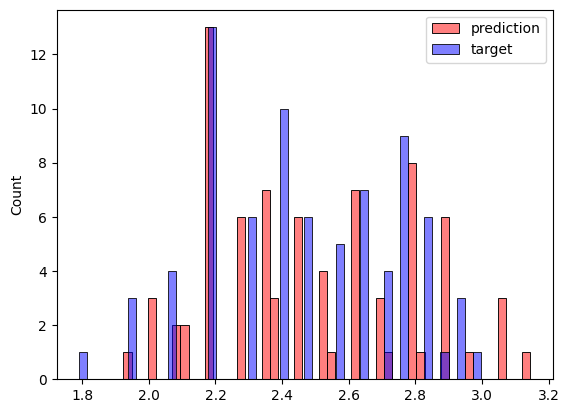

In [381]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Categorical variables

In [382]:
df_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [383]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 
       'reason', 'guardian']

categorical = {}

for column in categorical_columns:
    # Encode the categorical variable using LabelEncoder
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


In [387]:
def prepare_X(df):
    df = df.copy()
    
    features = base 

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [388]:
X_train = prepare_X(df_train)
q0, q = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = q0 + X_val.dot(q)
rmse(y_val, y_pred)

np.float64(0.045015373625840786)

In [389]:
q0, q

(np.float64(1.4882210329123216),
 array([ 0.00054482,  0.00287967, -0.01603405, -0.00382416,  0.00288887,
         0.00038144,  0.08610665,  0.00086874, -0.00072037]))

## Regularization

In [393]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    q_full = XTX_inv.dot(X.T).dot(y)
    
    return q_full[0], q_full[1:]

In [394]:
X_train = prepare_X(df_train)
q0, q = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = q0 + X_val.dot(q)
rmse(y_val, y_pred)

np.float64(0.04493796593284703)

## Tuninng the Model

In [395]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    q0, q = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = q0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, q0, score)

0.0 1.4882210329111536 0.048021591962152436
1e-05 1.4882066360655337 0.048016442925762376
0.0001 1.488077077035133 0.04797027563088307
0.001 1.4867827303126044 0.04752597643398664
0.1 1.356987291142807 0.12255145023664879
1 0.7575908636260746 0.7148568312760146
10 0.14330677228067948 1.3284900899379497


In [396]:
r = 0.001
X_train = prepare_X(df_train)
q0, q = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = q0 + X_val.dot(q)
score = rmse(y_val, y_pred)
score

np.float64(0.0450066898368853)

## Using the model

In [397]:
df_full_train = pd.concat([df_train, df_val])

In [398]:
df_full_train = df_full_train.reset_index(drop=True)

In [399]:
X_full_train = prepare_X(df_full_train)

In [400]:
X_full_train

array([[15,  4,  0, ..., 11, 13, 14],
       [15,  2,  0, ..., 17, 16, 16],
       [16,  2,  0, ..., 16, 16, 17],
       ...,
       [19,  2,  3, ...,  8,  7,  8],
       [17,  3,  0, ..., 12, 10, 12],
       [19,  2,  1, ..., 15, 12, 12]])

In [401]:
y_full_train = np.concatenate([y_train, y_val])

In [402]:
q0, q = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [403]:
X_test = prepare_X(df_test)
y_pred = q0 + X_test.dot(q)
score = rmse(y_test, y_pred)
score

np.float64(0.06354287511162988)

In [414]:
student = df_test.iloc[44].to_dict()
student

{'school': 'gp',
 'sex': 'f',
 'age': 17,
 'address': 'u',
 'famsize': 'gt3',
 'pstatus': 't',
 'medu': 4,
 'fedu': 2,
 'mjob': 'other',
 'fjob': 'other',
 'reason': 'reputation',
 'guardian': 'mother',
 'traveltime': 2,
 'studytime': 3,
 'failures': 0,
 'schoolsup': 'no',
 'famsup': 'yes',
 'paid': 'yes',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'yes',
 'romantic': 'no',
 'famrel': 4,
 'freetime': 3,
 'goout': 3,
 'dalc': 1,
 'walc': 1,
 'health': 3,
 'absences': 0,
 'g1': 15,
 'g2': 12,
 'g3': 14}

In [415]:
df_small = pd.DataFrame([student])
df_small

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,gp,f,17,u,gt3,t,4,2,other,other,...,4,3,3,1,1,3,0,15,12,14


In [416]:
X_small = prepare_X(df_small)

In [417]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(2.795440521355027)

In [418]:
np.expm1(y_pred)

np.float64(15.369838428438726)

In [421]:
np.expm1(y_test[16])

np.float64(11.0)

### _Summary_

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability